## Assessing the spectra during T4

In [41]:
from scipy.io import readsav
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
det = 6
DataDir = './DataFOXSI2/'
offset_xy = [360., -180.]
T4x, T4y = 200, 750
Dang = [-82.5000, -75.0000, 67.5000, 75.0000, -97.5000, -90.0000, 60.0000]  ## Detector angles
tlaunch = 69060.
Erange = [5, 10] # maximize the amount of counts we got
#Erange = [6, 12] # to be consistent with Hannah et al. (2007, 2010)
thr_n = 4.
R10s = 700
R07s = 500
Xmask, Ymask = -240, 360


def All_Data(datafile,Erange,Trange):
    ''' return all data - Good and No Good - '''
    # Read SAV LEV2 data : 
    data_lvl2_d6 = readsav(DataDir+datafile)[datafile[:-4]]
    # Energy selection :
    data_lvl2_d6_E = data_lvl2_d6[(np.stack(data_lvl2_d6['HIT_ENERGY']).T[1] > Erange[0]) &
                                  (np.stack(data_lvl2_d6['HIT_ENERGY']).T[1] < Erange[1]) &
                                  (np.stack(data_lvl2_d6['HIT_ENERGY']).T[0] > thr_n)]
    # Time selection :
    data_lvl2_d6_ET = data_lvl2_d6_E[(data_lvl2_d6_E['wsmr_time'] > Trange[0]) & 
                                    (data_lvl2_d6_E['wsmr_time'] < Trange[1])]
    return data_lvl2_d6_ET

def Good_Data(datafile,Erange,Trange):
    # Read SAV LEV2 data : 
    data_lvl2_d6 = readsav(DataDir+datafile)[datafile[:-4]]
    # Energy selection :
    data_lvl2_d6_E = data_lvl2_d6[(np.stack(data_lvl2_d6['HIT_ENERGY']).T[1] > Erange[0]) &
                                  (np.stack(data_lvl2_d6['HIT_ENERGY']).T[1] < Erange[1]) &
                                  (np.stack(data_lvl2_d6['HIT_ENERGY']).T[0] > thr_n)]
    # Time selection :
    data_lvl2_d6_ET = data_lvl2_d6_E[(data_lvl2_d6_E['wsmr_time'] > Trange[0]) & 
                                    (data_lvl2_d6_E['wsmr_time'] < Trange[1])]
    # Good_Data selection :
    data_lvl2_d6_ET_noerr = data_lvl2_d6_ET[data_lvl2_d6_ET['ERROR_FLAG']==0]
    return data_lvl2_d6_ET_noerr

def plotdata(FXDX, det):
    fig, ax = plt.subplots(figsize=(10,10))
    # ornaments
    ax.set_xlim(-1450,1450)
    ax.set_ylim(-1450,1450)
    ax.set_xlabel('arcsec',fontsize=28)
    ax.set_ylabel('arcsec',fontsize=28)
    ax.tick_params(axis='both', labelsize=20)
    ax.set_title('FOXSI2 - Target 4 - Det '+str(det),fontsize=28)
    # FOXSI2 Data
    ax.scatter(np.stack(FXDX['HIT_XY_SOLAR']).T[0] + offset_xy[0],
               np.stack(FXDX['HIT_XY_SOLAR']).T[1]+ offset_xy[1],
               marker='o',color='black',alpha=0.4)
    # D6 - Si
    l = 990
    mx = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(Dang[det]-45)) + 1)
    my = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(Dang[det]-135)) + 1)
    rect = patches.Rectangle((T4x-l/2+mx,T4y-l/2+my),990,990,angle=Dang[det],linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
    solardisk = patches.Circle((0,0),radius= 960,fill=False);ax.add_patch(solardisk)
    r = (R10s if det == 6 else R07s)
    circ = patches.Circle((Xmask,Ymask),radius= r,fill=False);ax.add_patch(circ)
    plt.show()
    fig.savefig('F2T4D'+str(det)+'S.png',bbox_inches='tight',dpi=300)
    plt.close(fig)

def plotspect(FXDX):
    es = np.stack(FXDX['hit_energy']).T[1] # get energy values
    det = FXDX['det_num'][0]
    # plot spectrum
    fig, ax = plt.subplots(figsize=(8,6))
    # ornaments
    ax.set_xlim(4,11)
    ax.set_ylim(0,1)
    ax.set_xlabel('Energy [keV]',fontsize=28)
    ax.set_yticks([])
    ax.tick_params(axis='x', labelsize=20)
    ax.set_title('FOXSI2 - Target 4 - Det '+str(det),fontsize=28)
    ax.axvspan(5, 10, alpha=0.2, color='grey')
    # FOXSI2 Data
    ax.scatter(es, np.ones_like(es)*.5,s=250, c='grey', marker='o',alpha=0.7)
    ax.vlines(es,ymin=0,ymax=1,color='grey',linestyles='dashed')
    plt.show()
    fig.savefig('F2T4D'+str(det)+'_Spec.pdf',bbox_inches='tight',dpi=300)
    plt.close(fig)

def plothist(FXDX):
    es = np.stack(FXDX['hit_energy']).T[1] # get energy values
    det = FXDX['det_num'][0]
    # plot spectrum
    fig, ax = plt.subplots(figsize=(8,6))
    # ornaments
    ax.set_xlim(4,11)
    ax.set_xlabel('Energy [keV]',fontsize=28)
    ax.set_yticks([])
    ax.tick_params(axis='x', labelsize=20)
    ax.set_title('FOXSI2 - Target 4 - Det '+str(det),fontsize=28)
    ax.axvspan(5, 10, alpha=0.2, color='grey')
    # FOXSI2 Data
    ax.hist(es,bins=21,range=Erange,color='grey')
    plt.show()
    fig.savefig('images/F2T4D'+str(det)+'_Hist.pdf',bbox_inches='tight',dpi=300)
    plt.close(fig)

def plothist_gr(FXDX):
    det = FXDX['det_num'][0]
    Rmask = (R10s if det == 6 else R07s)
    FX = np.stack(FXDX['HIT_XY_SOLAR']).T[0] + offset_xy[0]
    FY = np.stack(FXDX['HIT_XY_SOLAR']).T[1]+ offset_xy[1]
    EE = np.stack(FXDX['HIT_ENERGY']).T[1]
    EEgr = EE[(np.sqrt((FX - Xmask )**2 + (FY - Ymask)**2) > Rmask)]
    # plot spectrum
    fig, ax = plt.subplots(figsize=(8,6))
    # ornaments
    ax.set_xlim(4,11)
    ax.set_xlabel('Energy [keV]',fontsize=28)
    ax.set_yticks([])
    ax.tick_params(axis='x', labelsize=20)
    ax.set_title('FOXSI2 - Target 4 - Det '+str(det),fontsize=28)
    ax.axvspan(5, 10, alpha=0.2, color='grey')
    # FOXSI2 Data
    ax.hist(EEgr,bins=21,range=Erange,color='grey')
    plt.show()
    fig.savefig('images/F2T4D'+str(det)+'_HistNoGR.pdf',bbox_inches='tight',dpi=300)
    plt.close(fig)

In [2]:
# Defining times:
t4_start = 373.5
t4_end   = 466.2
t_shtr_start = 438.0 #+ 4. # add +4sec to test background
t_shtr_end   = 442.0
Trange6 = np.array((t4_start, t4_end)) + tlaunch
Trange0145 = np.array((t4_start, t_shtr_start)) + tlaunch
Trangeshtr = np.array((t_shtr_start, t4_end)) + tlaunch

In [3]:
# Loading FOXSI2 Data - ONLY GOOD DATA - :
# 10-shell
F2D6 = Good_Data('data_lvl2_d6.sav',Erange,Trange6)
# 7-shell
F2D5 = Good_Data('data_lvl2_d5.sav',Erange,Trange0145)
F2D4 = Good_Data('data_lvl2_d4.sav',Erange,Trange0145)
F2D1 = Good_Data('data_lvl2_d1.sav',Erange,Trange0145)
F2D0 = Good_Data('data_lvl2_d0.sav',Erange,Trange0145)
# shutter
F2D5S = Good_Data('data_lvl2_d5.sav',Erange,Trangeshtr)
F2D4S = Good_Data('data_lvl2_d4.sav',Erange,Trangeshtr)
F2D1S = Good_Data('data_lvl2_d1.sav',Erange,Trangeshtr)
F2D0S = Good_Data('data_lvl2_d0.sav',Erange,Trangeshtr)

In [4]:
# Loading FOXSI2 Data - ALL DATA - :
# NEEDED only for LIFETIME estimate purposes
# 10-shell
F2D6_All = All_Data('data_lvl2_d6.sav',Erange,Trange6)
# 7-shell
F2D5_All = All_Data('data_lvl2_d5.sav',Erange,Trange0145)
F2D4_All = All_Data('data_lvl2_d4.sav',Erange,Trange0145)
F2D1_All = All_Data('data_lvl2_d1.sav',Erange,Trange0145)
F2D0_All = All_Data('data_lvl2_d0.sav',Erange,Trange0145)
# shutter
F2D5S_All = All_Data('data_lvl2_d5.sav',Erange,Trangeshtr)
F2D4S_All = All_Data('data_lvl2_d4.sav',Erange,Trangeshtr)
F2D1S_All = All_Data('data_lvl2_d1.sav',Erange,Trangeshtr)
F2D0S_All = All_Data('data_lvl2_d0.sav',Erange,Trangeshtr)

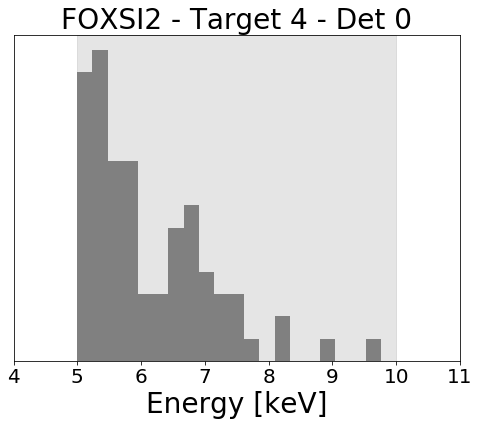

In [46]:
plothist(F2D0)

### All detector Together

In [74]:
def get_energies(FXDX):
    det = FXDX['det_num'][0]
    Rmask = (R10s if det == 6 else R07s)
    FX = np.stack(FXDX['HIT_XY_SOLAR']).T[0] + offset_xy[0]
    FY = np.stack(FXDX['HIT_XY_SOLAR']).T[1]+ offset_xy[1]
    EE = np.stack(FXDX['HIT_ENERGY']).T[1]
    return EE[(np.sqrt((FX - Xmask )**2 + (FY - Ymask)**2) > Rmask)]

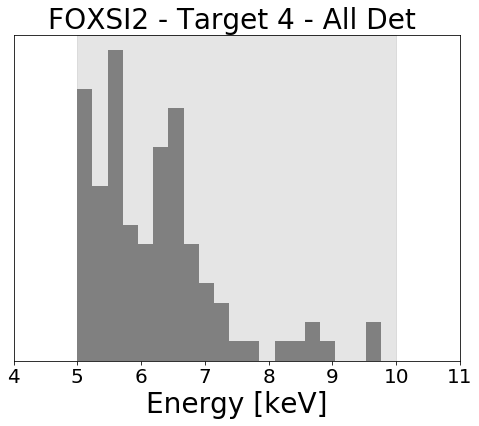

In [75]:
EEgr0 = get_energies(F2D0)
EEgr1 = get_energies(F2D1)
EEgr4 = get_energies(F2D4)
EEgr5 = get_energies(F2D5)
EEgr6 = get_energies(F2D6)
EEgrAll = np.concatenate((EEgr0, EEgr1, EEgr4, EEgr5, EEgr6), axis=0)

fig, ax = plt.subplots(figsize=(8,6))
# ornaments
ax.set_xlim(4,11)
ax.set_xlabel('Energy [keV]',fontsize=28)
ax.set_yticks([])
ax.tick_params(axis='x', labelsize=20)
ax.set_title('FOXSI2 - Target 4 - All Det ',fontsize=28)
ax.axvspan(5, 10, alpha=0.2, color='grey')
# FOXSI2 Data
ax.hist(EEgrAll,bins=21,range=Erange,color='grey')
plt.show()
fig.savefig('images/F2T4_HistNoGR_All.pdf',bbox_inches='tight',dpi=300)
plt.close(fig)

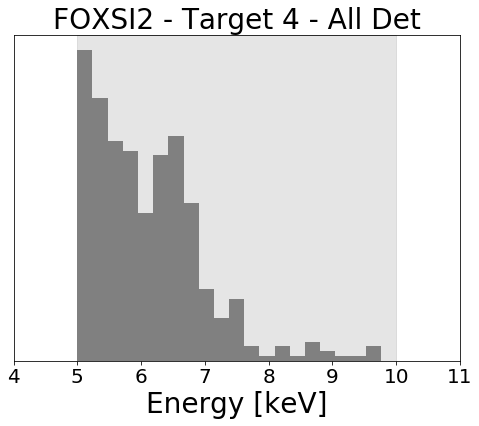

In [66]:
es0 = np.stack(F2D0['hit_energy']).T[1]
es1 = np.stack(F2D1['hit_energy']).T[1]
es4 = np.stack(F2D4['hit_energy']).T[1]
es5 = np.stack(F2D5['hit_energy']).T[1]
es6 = np.stack(F2D6['hit_energy']).T[1]
esAll = np.concatenate((es0, es1,es4, es5, es6), axis=0)

fig, ax = plt.subplots(figsize=(8,6))
# ornaments
ax.set_xlim(4,11)
ax.set_xlabel('Energy [keV]',fontsize=28)
ax.set_yticks([])
ax.tick_params(axis='x', labelsize=20)
ax.set_title('FOXSI2 - Target 4 - All Det',fontsize=28)
ax.axvspan(5, 10, alpha=0.2, color='grey')
# FOXSI2 Data
ax.hist(esAll,bins=21,range=Erange,color='grey')
plt.show()
fig.savefig('images/F2T4_Hist_All.pdf',bbox_inches='tight',dpi=300)
plt.close(fig)